Install the required packages

In [2]:
%pip install kagglehub
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn
import seaborn as sns
from scipy.stats import norm, alpha
import matplotlib.pyplot as plt
import numpy as np


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
# print("Path to dataset files:", path) use only for debug
file_path1 = os.path.join(path, "yellow_tripdata_2015-01.csv")  # Path to the dataset file
file_path2 = os.path.join(path, "yellow_tripdata_2016-01.csv")  # Path to the dataset file
file_path3 = os.path.join(path, "yellow_tripdata_2016-02.csv")  # Path to the dataset file
file_path4 = os.path.join(path, "yellow_tripdata_2016-03.csv")  # Path to the dataset file

# Update and change the column name in first dataset

In [9]:
def update_and_change(file_path):
    df = pd.read_csv(file_path)
    # Update the column name
    if 'RateCodeID' in df.columns:
        df.rename(columns={'RateCodeID': 'RatecodeID'}, inplace=True)
    return df

df_2015_01 = update_and_change(file_path1)

name of the columns in the dataset

In [3]:
# Check if the file exists
if os.path.exists(file_path1):
    # upload the file to the notebook
    df = pd.read_csv(file_path1)

    # Print the colum names
    print("Nomi delle colonne nel dataset:", df.columns.tolist())
else:
    print(f"Il file non esiste. Controlla il percorso: {file_path1}")


Nomi delle colonne nel dataset: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


Union of the dataset and creation of the bar plot for the frequency of the VendorID

In [4]:
vendor_colum = ['VendorID']
df_2015_01 = pd.read_csv(file_path1, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=vendor_colum)    # Load the dataset  in a DataFrame

# Concatenate the dataframes
df = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

Creation of the bar plot for the frequency of the VendorID

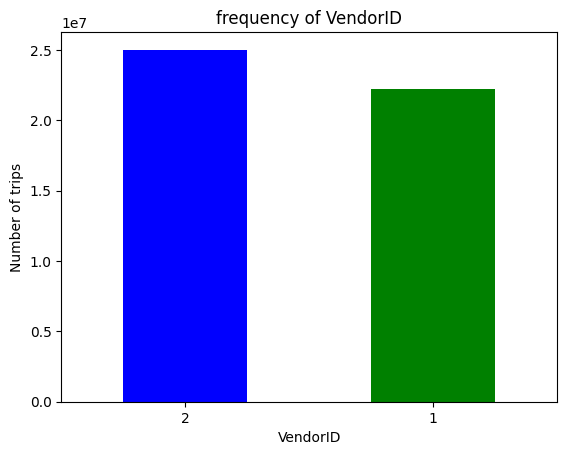

In [5]:
fr_vendor = df['VendorID'].value_counts()

# creation of the bar plot
fr_vendor.plot(kind='bar', color=['blue', 'green'])

# add title and labels
plt.title("frequency of VendorID")
plt.xlabel("VendorID")
plt.ylabel("Number of trips")
plt.xticks(rotation=0)

# show the plot
plt.show()

In [10]:
# union in a single csv only with the column RateCodeID
colum_rate = ['RatecodeID'] 
df_2015_01_filtered = df_2015_01[['RatecodeID']]    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=colum_rate)    # Load the dataset  in a DataFrame


In [11]:
df=pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

Creation of the bar plot for the frequency of the RateCodeID

In [4]:
# Count the frequency of each RateCodeID
frequent_rate_id = df['RatecodeID'].value_counts()

# create the bar plot
plt.figure(figsize=(10, 6))
frequent_rate_id.plot(kind='bar', color='skyblue')

# add title and labels
plt.title("Frequenza dei Codici Tariffari (RateCodeID)")
plt.xlabel("RatecodeID")
plt.ylabel("Numero di corse")
plt.xticks(rotation=0)
#show the plot
plt.show()
print(frequent_rate_id)

NameError: name 'df' is not defined

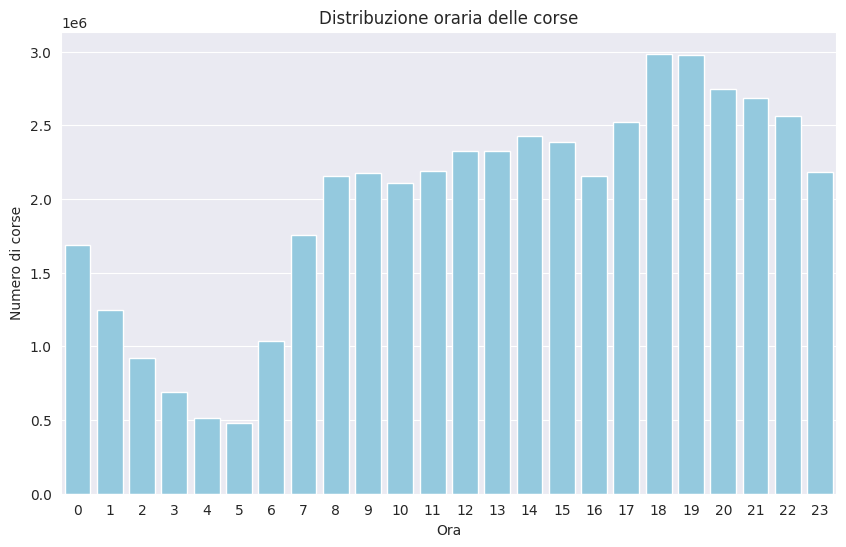

In [5]:
import seaborn as sns
from scipy.stats import norm, alpha
import matplotlib.pyplot as plt
import numpy as np
colum = ['tpep_pickup_datetime'] # scelgo la colonna tpep_pickup_datetime
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum)     
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

# convert the column to datetime
df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

# extract the hour from the datetime
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour

# create the gaussian distribution
# plt.figure(figsize=(10, 6))
# df_total['hour'].hist(bins=24, color='skyblue', edgecolor='black')

#couht the frequency of each hour
hour_freq = df_total['hour'].value_counts().sort_index()

# create array with the hours
hours=hour_freq.index
counts=hour_freq.values

#plot for hour distribution of trips
plt.figure(figsize=(10, 6))
sns.barplot(x=hours, y=counts, color='skyblue')
plt.title("Distriubution of trips by hour")
plt.xlabel("hour")
plt.ylabel("Number of trips")
plt.xticks(np.arange(0, 24, 1))
plt.show()

Calculate the mean and the standard deviation of the distribution

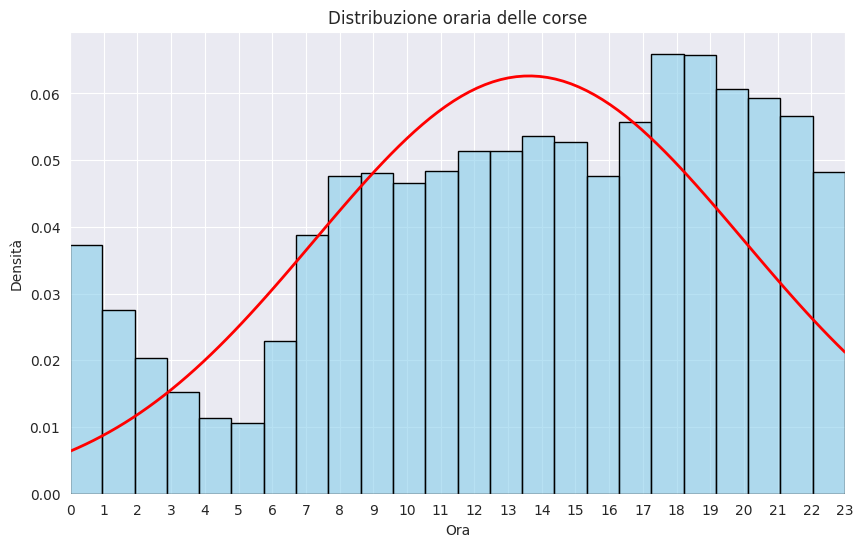

/tmp/ipykernel_12864/393718767.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


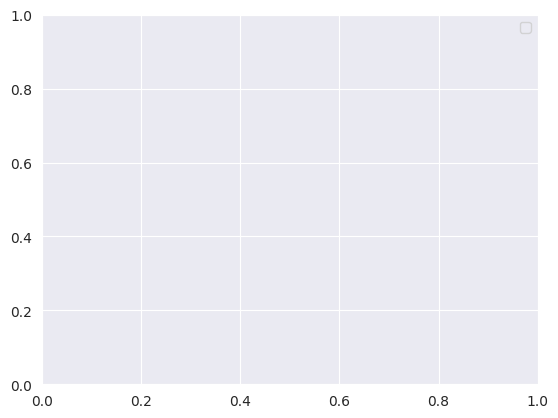

In [6]:
mu, std = norm.fit(df_total['hour'])

# create the gaussian distribution
xmin,xmax=0,23
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# plot the histogram 
# plt.figure(figsize=(10, 6))
# plt.plot(x,p,'r-', lw=2 ,label='Gaussian fit' ) # Gaussian fit
# sns.histplot(df_total['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False,alpha=0.6)
# plt.title("Distribuzione oraria delle corse")
# plt.xlabel("Ora")
# plt.ylabel("Densità")
# plt.xticks(np.arange(0, 24, 1))
# plt.show()
# plt.legend()
#center the plot in the middle
# plt.xlim(xmin,xmax)
# plt.show()
#plot the instogram and the gaussian distribution centered in the middle
plt.figure(figsize=(10, 6))
plt.plot(x,p,'r-', lw=2 ,label='Gaussian fit' ) # Gaussian fit
sns.histplot(df_total['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False,alpha=0.6)
#order the x axis and put the center of gayssian distribution in the middle
plt.xlim(xmin,xmax)
plt.title("Distribution of trips by hour")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.xticks(np.arange(0, 24, 1))
plt.show()
plt.legend()

# ha un errore sto codice poi lo vedo

%barplot follow median and standard deviation

In [7]:
#order values from media, so they can follow the gaussian distribution
df_total['distance_from_mean']=np.abs(df_total['hour']-mu)
df_sorted=df_total.sort_values('distance_from_mean')

#plot the barplot
xmin,xmax=0,23
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x,mu,std)

plt.figure(figsize=(10,6))
plt.plot(x, p, 'r-', lw=2, label='Gaussian fit')  # Gaussian fit
sns.histplot(df_sorted['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)
plt.title("Distribution of trips by hour")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.show()

NameError: name 'np' is not defined

### Analisi sulla drip distance

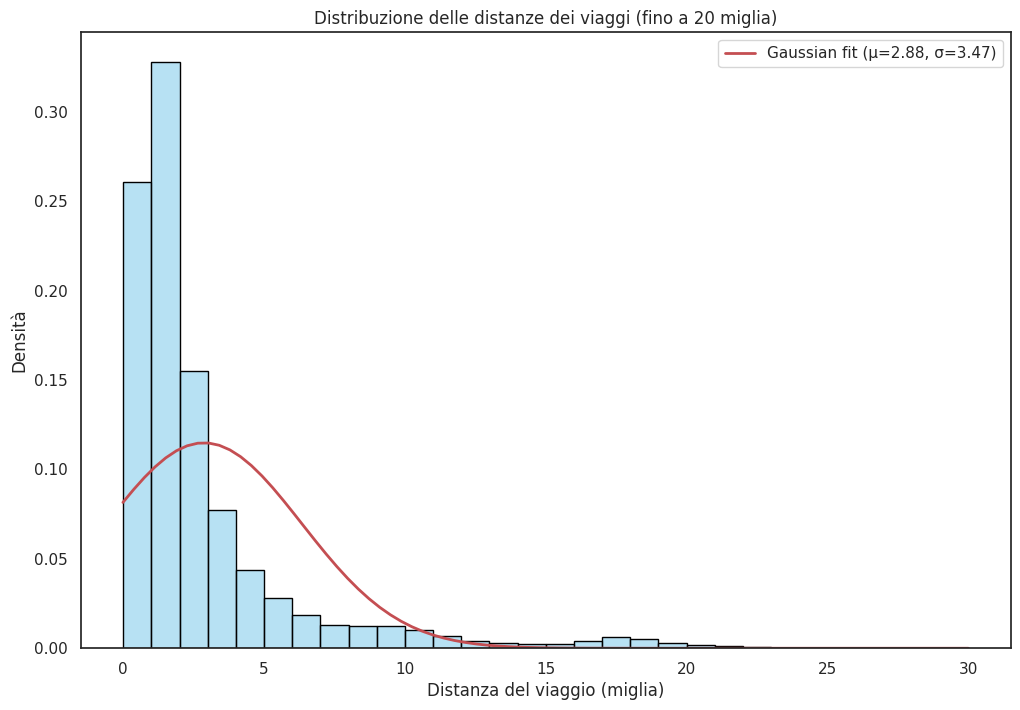

In [8]:
plt.style.use('default')  
sns.set_theme(style="white")  # Set the style of the plots

# Load the dataset in a DataFrame
columns=['trip_distance']
df_2015_01 = pd.read_csv(file_path1, usecols=columns)   # Load the dataset  in a DataFrame  
df_2016_01 = pd.read_csv(file_path2, usecols=columns)
df_2016_02 = pd.read_csv(file_path3, usecols=columns)
df_2016_03 = pd.read_csv(file_path4, usecols=columns)

# Filter date with trip distance between 0 and 100 miles
df_total = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)
df_total_filtered = df_total[(df_total['trip_distance'] > 0) & (df_total['trip_distance'] <= 30)]

# Calculate the mean and standard deviation of the distribution
mu, std = norm.fit(df_total_filtered['trip_distance'])

# Create the Gaussian distribution
x = np.linspace(0, 30, 80)
p = norm.pdf(x, mu, std)        # Gaussian distribution

# Plot the histogram and the Gaussian distribution
plt.figure(figsize=(12, 8))
sns.histplot(df_total_filtered['trip_distance'], bins=30, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)
plt.plot(x, p, 'r-', lw=2, label=f'Gaussian fit (μ={mu:.2f}, σ={std:.2f})')  # Curve of the Gaussian distribution
plt.title("Distribuzione delle distanze dei viaggi (fino a 20 miglia)")
plt.xlabel("Distanza del viaggio (miglia)")
plt.ylabel("Densità")
plt.legend()
plt.show()
